In [1]:
import pandas as pd
import pyreadstat

import os, re

PATH_RAW = '../data/raw/'

files = []
for path in os.listdir(PATH_RAW):
    for file in os.listdir(PATH_RAW+f'{path}/'):
        if '.sav' in file:
            files.append(PATH_RAW+f'{path}/'+f'{file}')                        

In [31]:
for file in files:
    df, meta  = pyreadstat.read_sav(file)
    df.to_csv(file.replace('sav','csv'),index=False)

In [3]:
file = '../data/raw/2016/Estudiante_5-6 año Secundaria 2016.sav'
df, meta  = pyreadstat.read_sav(file)

In [4]:
df.head()

,sector,ambito,cod_provincia,Municipio,Ap1,Ap2,Ap3a,Ap3b,Ap3c,Ap4,...,autoconlenguam,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,iclimacs,iclimacn,isocioacn,isocioacs
0,3.0,3.0,06,,5.0,1.0,1.0,1.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,06,,3.0,1.0,1.0,1.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,06,,2.0,1.0,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,06,,2.0,1.0,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,3.0,06,,4.0,1.0,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.cod_provincia = df.cod_provincia.astype('category')

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

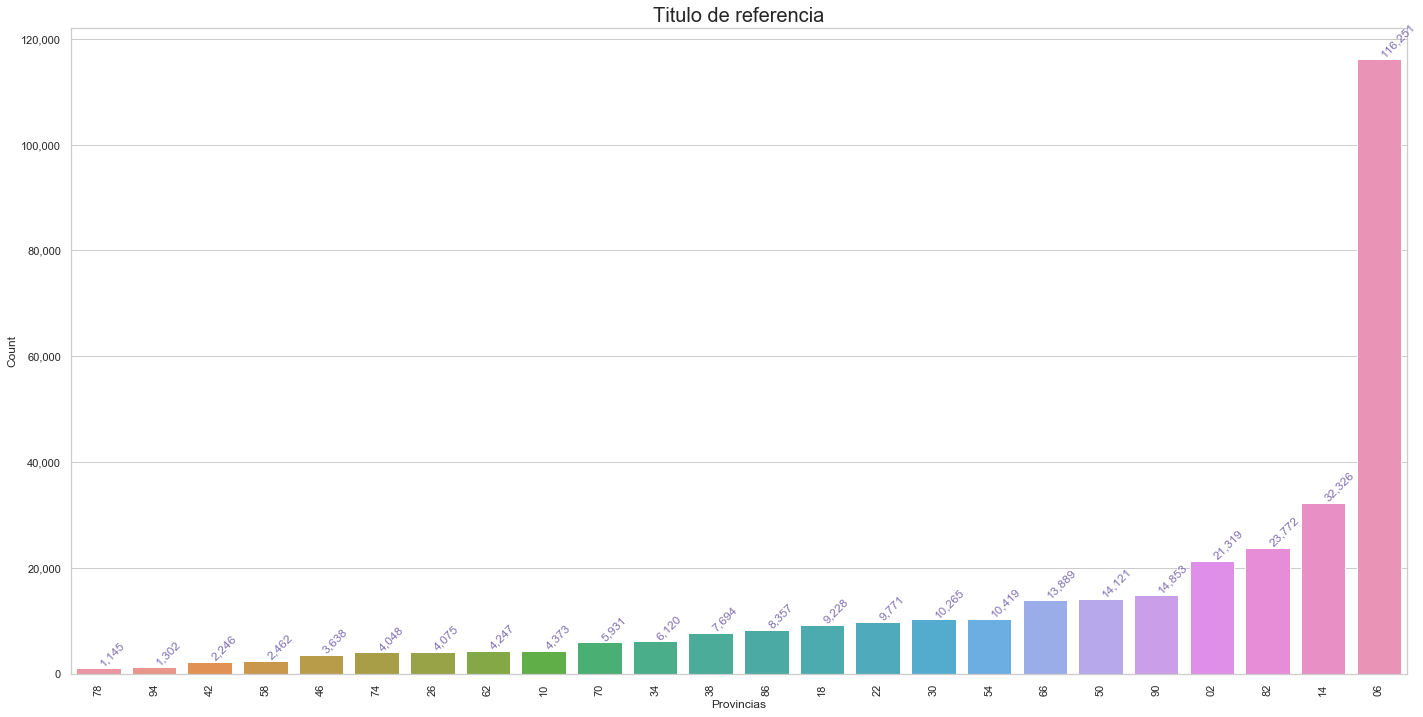

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
data =df.cod_provincia.value_counts().to_frame().reset_index().sort_values('cod_provincia')
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.barplot(data = data , 
                 x ='index',y='cod_provincia',order = data['index']
                )



ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Provincias", ylabel='Count')
# add proper Dim values as x labels
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(data["cod_provincia"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()

plt.title('Titulo de referencia',size =20)
plt.show()